The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

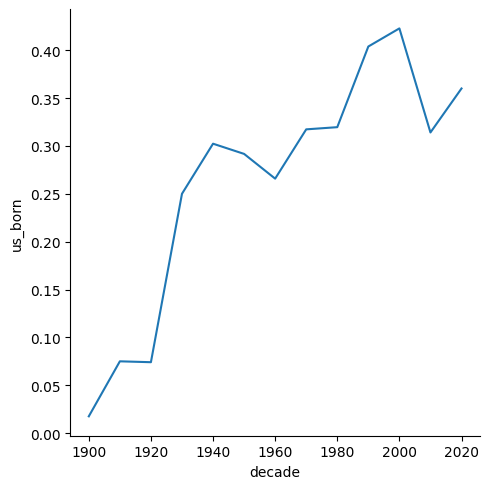

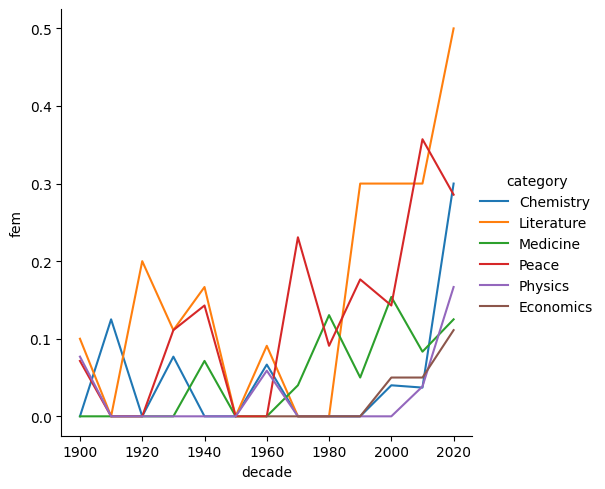

In [4]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Reading csv and getting the most common gender and country
df = pd.read_csv("data/nobel.csv")
top_gender = df.value_counts("sex").index[0]
top_country = df.value_counts("birth_country").index[0]

# Decade with the most US-born Nobel Prize winners
# New column in df as a flag that indicates US born nobels
df["us_born"] = df["birth_country"] == "United States of America"
#Column for decades
df["decade"] = (np.floor(df["year"]/10)*10).astype(int)
# Getting the ratio
max_us = df.groupby("decade", as_index=False)["us_born"].mean()
max_decade_usa = max_us[max_us["us_born"] == max_us["us_born"].max()]["decade"].values[0]
# Plotting
ax1 = sns.relplot(kind="line", data=max_us, x="decade", y="us_born")

# Decade and category with the most female winners
df["fem"] = df["sex"] == "Female"
win_dec_wom = df.groupby(by=["decade", "category"], as_index=False)["fem"].mean()
max_fem_dec = win_dec_wom[win_dec_wom["fem"] == win_dec_wom["fem"].max()][['decade', 'category']]
max_female_dict = {max_fem_dec["decade"].values[0]:max_fem_dec["category"].values[0]}
ax2 = sns.relplot(kind="line", data=win_dec_wom, x="decade", y="fem", hue="category")

# First woman to win a Nobel
nobel_women = df[df["fem"]]
min_row = nobel_women[nobel_women["year"] == nobel_women["year"].min()]
first_woman_name = min_row["full_name"].values[0]
first_woman_category = min_row["category"].values[0]

# Reperar winners
counts = df["full_name"].value_counts()
names = counts[counts >= 2].index
repeat_list = list(names)
